In [2]:
import pandas as pd
df = pd.read_csv("NIFTY_50.csv", parse_dates=["Date"], index_col="Date")

## Index

### 1) Open in days range
### 2) Close in days range
####  Analysis of orb days 

### 3) Statistics of days just after trending days
### 4) Gaps analysis

In [2]:
df.head()

,Open,High,Low,Close
Date,,,,
2021-11-25,17417.30,17564.35,17351.70,17536.25
2021-11-24,17550.05,17600.60,17354.00,17415.05
2021-11-23,17281.75,17553.70,17216.10,17503.35
2021-11-22,17796.25,17805.25,17280.45,17416.55
2021-11-18,17890.55,17945.60,17688.50,17764.80


In [3]:
df = df.dropna(how = 'all')

In [4]:
df.shape

(2587, 4)

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [6]:
cols = ['Open', 'High', 'Low', 'Close']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
df.shape

(2587, 4)

In [4]:
df["OPR"] = (df['Open'] - df['Low'])/(df['High'] - df['Low'])

In [5]:
df["CPR"] = (df['Close'] - df['Low'])/(df['High'] - df['Low'])

In [81]:
df['OPR'].describe()

count    2587.000000
mean        0.546738
std         0.332525
min         0.000000
25%         0.249898
50%         0.575758
75%         0.861560
max         1.000000
Name: OPR, dtype: float64

In [92]:
df['CPR'].describe()

count    2587.000000
mean        0.512287
std         0.294391
min         0.033240
25%         0.223776
50%         0.509195
75%         0.809386
max         0.967550
Name: CPR, dtype: float64

(array([366., 204., 160., 213., 174., 233., 218., 214., 259., 546.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

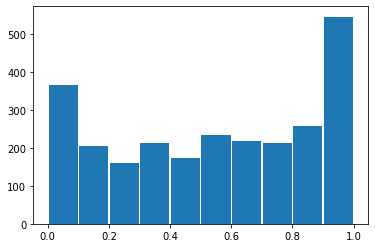

In [7]:
 
plt.hist(df["OPR"],rwidth=0.95,bins=bin_range)

(array([153., 429., 262., 234., 203., 191., 197., 236., 426., 256.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

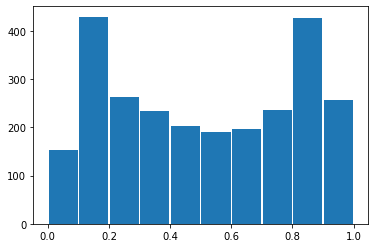

In [12]:
plt.hist(df["CPR"],rwidth=0.95,bins=bin_range)

In [6]:
df["Solid"] = (abs(df['Open'] - df['Close']))/(df['High'] - df['Low'])

(array([218., 235., 251., 294., 291., 282., 301., 291., 323., 101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

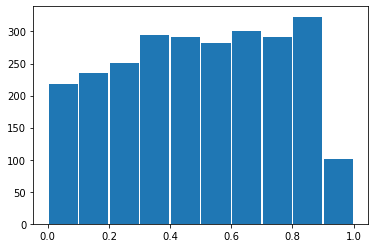

In [14]:
plt.hist(df["Solid"],rwidth=0.95,bins=bin_range)


(array([ 46.,  41.,  60.,  82.,  99., 132., 210., 281., 323., 101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

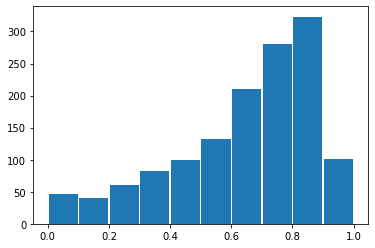

In [15]:
plt.hist(df["Solid"][(df['OPR'] >= 0.80) | (df['OPR'] <= 0.2)],rwidth=0.95,bins=bin_range)

In [16]:
df["Solid"][(df['OPR'] >= 0.80) | (df['OPR'] <= 0.2)].describe()

count    1375.000000
mean        0.645135
std         0.229858
min         0.000602
25%         0.518235
50%         0.708955
75%         0.826902
max         0.966760
Name: Solid, dtype: float64

In [8]:
df['True_Range_ratio'] = ((df['High'] - df['Low'])/df['Close'])*100

In [18]:
df['True_Range_ratio'].describe()

count    2587.000000
mean        1.253938
std         0.876865
min         0.246096
25%         0.751932
50%         1.055514
75%         1.492380
max        16.133046
Name: True_Range_ratio, dtype: float64

In [179]:
df['True_Range_ratio'][(df['OPR'] >= 0.80) | (df['OPR'] <= 0.2)].describe()

count    1375.000000
mean        1.362758
std         0.919936
min         0.285732
25%         0.809042
50%         1.153169
75%         1.649487
max        16.133046
Name: True_Range_ratio, dtype: float64

In [26]:
df['True_Range_ratio'][(df['OPR'] <= 0.80) & (df['OPR'] >= 0.2)].describe()

count    1212.000000
mean        1.130483
std         0.808096
min         0.246096
25%         0.701949
50%         0.964263
75%         1.340167
max        16.114694
Name: True_Range_ratio, dtype: float64

In [20]:
df[df['True_Range_ratio'] == df['True_Range_ratio'].max()]

,Open,High,Low,Close,OPR,CPR,Solid,True_Range_ratio
Date,,,,,,,,
2012-10-05,5815.0,5815.35,4888.2,5746.9,0.999622,0.926172,0.073451,16.133046


(array([107., 249., 120.,  97.,  67.,  52.,  45.,  32.,  32.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

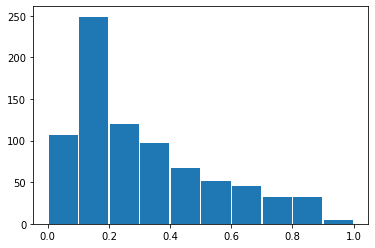

In [21]:
plt.hist(df["CPR"][(df['OPR'] >= 0.80)],rwidth=0.95,bins=bin_range)

(array([  3.,  13.,  10.,  21.,  33.,  33.,  59.,  59., 181., 158.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

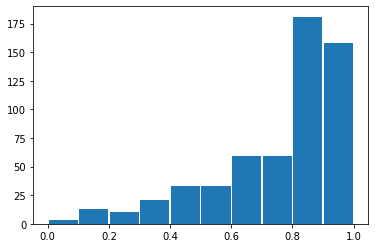

In [22]:
plt.hist(df["CPR"][(df['OPR'] <= 0.20)],rwidth=0.95,bins=bin_range)

In [23]:
df["CPR"][(df['OPR'] <= 0.20)].describe()

count    570.000000
mean       0.754804
std        0.201824
min        0.069586
25%        0.653634
50%        0.841592
75%        0.905604
max        0.967550
Name: CPR, dtype: float64

In [25]:
df["CPR"][(df['OPR'] >= 0.80)].describe()

count    805.000000
mean       0.310578
std        0.222668
min        0.033240
25%        0.128937
50%        0.240380
75%        0.440428
max        0.948280
Name: CPR, dtype: float64

In [23]:
df["CPR"][(df['OPR'] > 0.5)].describe()

count    1470.000000
mean        0.374005
std         0.255748
min         0.033240
25%         0.154641
50%         0.297771
75%         0.564268
max         0.948280
Name: CPR, dtype: float64

## Conclusion
#### OPR analysis portrays the importance of open in day-trading 
#### More than 75% of the trades close on the opposite half of the day's range from the open 
#### True Range of OPR trades also tend to be greater than normal days (though not significantly)



#### 
#### Now, lets begin by analyzing days after trending days



## Part 2 :
### Analysis of previous and next days to trending days

### 1) True Range 

In [10]:
df['TRR_Next'] = df['True_Range_ratio'].shift(1)

In [135]:
df['TRR_Next'][(df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)].describe() 

count    356.000000
mean       1.472442
std        1.173755
min        0.246096
25%        0.871451
50%        1.202898
75%        1.752883
max       16.114694
Name: TRR_Next, dtype: float64

In [136]:
df['TRR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       1.173752
std        0.766586
min        0.297315
25%        0.730633
50%        0.961844
75%        1.415104
max        7.564190
Name: TRR_Next, dtype: float64

In [137]:
df['TRR_Next'][(df['True_Range_ratio'] >= 1.4)].describe()

count    749.000000
mean       1.655305
std        1.129800
min        0.302273
25%        1.029862
50%        1.392656
75%        1.986087
max       16.114694
Name: TRR_Next, dtype: float64

In [138]:
df['TRR_Next'][(df['True_Range_ratio'] <= 0.8)].describe()

count    758.000000
mean       0.931227
std        0.456054
min        0.276854
25%        0.610523
50%        0.821261
75%        1.144860
max        3.549769
Name: TRR_Next, dtype: float64

#### The above stat suggests that the volatility tends not to change on consecutive days

#### And, volatility tends to shrink on upmoves

In [11]:
df['TRR_Prev'] = df['True_Range_ratio'].shift(-1)

In [98]:
df['True_Range_ratio'][((df['OPR'] >= 0.80) | (df['OPR'] <= 0.2))].describe()

count    1375.000000
mean        1.362758
std         0.919936
min         0.285732
25%         0.809042
50%         1.153169
75%         1.649487
max        16.133046
Name: True_Range_ratio, dtype: float64

In [30]:
df['TRR_Prev'][((df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)) | ((df['CPR'] >= 0.80) & (df['OPR'] <= 0.2))].describe()

count    695.000000
mean       1.265737
std        1.112006
min        0.276854
25%        0.750087
50%        1.046540
75%        1.454658
max       16.133046
Name: TRR_Prev, dtype: float64

In [31]:
df['True_Range_ratio'][((df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)) | ((df['CPR'] >= 0.80) & (df['OPR'] <= 0.2))].describe()

count    695.000000
mean       1.580923
std        0.919566
min        0.326644
25%        0.983439
50%        1.364764
75%        1.927395
max        8.507699
Name: True_Range_ratio, dtype: float64

#### Above stat suggests that trend days tend to have larger range

#### Also, previous days range doesn't suggest anything about impending trend move

In [69]:
df['True_Range_ratio'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       1.466089
std        0.890787
min        0.326644
25%        0.953657
50%        1.304787
75%        1.744601
max        8.059094
Name: True_Range_ratio, dtype: float64

In [87]:
df['TRR_Prev'][(df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)].describe()

count    356.000000
mean       1.276441
std        1.306923
min        0.285732
25%        0.735427
50%        1.026313
75%        1.476315
max       16.133046
Name: TRR_Prev, dtype: float64

In [88]:
df['TRR_Prev'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       1.254495
std        0.862997
min        0.276854
25%        0.760998
50%        1.066749
75%        1.409783
max        8.990246
Name: TRR_Prev, dtype: float64

### The above analysis (TRR_Prev) provides that there is no apparent indication about OPR day on the basis of previous day range

# NR4

In [12]:
df['TRR_Prev2'] = df['True_Range_ratio'].shift(-2)
df['TRR_Prev3'] = df['True_Range_ratio'].shift(-3)
df['TRR_Prev4'] = df['True_Range_ratio'].shift(-4)

df['True_Range_ratio'][(df['TRR_Prev'] < df['TRR_Prev2']) & ( df['TRR_Prev2'] < df['TRR_Prev3']) & ( df['TRR_Prev3'] < df['TRR_Prev4'])].describe()

count    151.000000
mean       1.283287
std        0.856930
min        0.401487
25%        0.719724
50%        1.160962
75%        1.545729
max        7.958835
Name: True_Range_ratio, dtype: float64

In [40]:
df['OPR'][(df['TRR_Prev'] < df['TRR_Prev2']) & ( df['TRR_Prev2'] < df['TRR_Prev3']) & ( df['TRR_Prev3'] < df['TRR_Prev4'])].describe()

count    151.000000
mean       0.535096
std        0.339538
min        0.000000
25%        0.235325
50%        0.554366
75%        0.866869
max        1.000000
Name: OPR, dtype: float64

(array([21., 14., 13., 11.,  9., 16.,  9.,  7., 19., 32.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

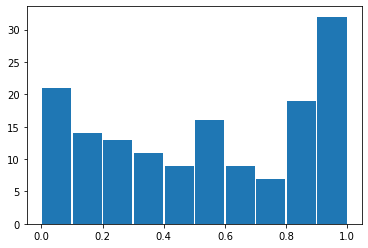

In [42]:
plt.hist(df['OPR'][(df['TRR_Prev'] < df['TRR_Prev2']) & ( df['TRR_Prev2'] < df['TRR_Prev3']) & ( df['TRR_Prev3'] < df['TRR_Prev4'])],rwidth=0.95,bins=bin_range)

(array([193., 101.,  88., 109.,  90., 124., 106.,  94., 138., 297.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

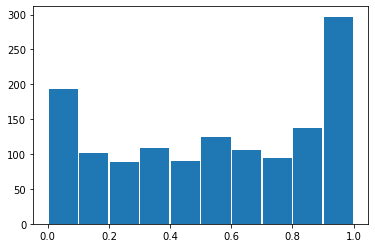

In [49]:
plt.hist(df['OPR'][(df['TRR_Prev'] < df['TRR_Prev2'])],rwidth=0.95,bins=bin_range)

In [83]:
df['OPR'][(df['TRR_Prev'] < df['TRR_Prev2'])].describe()

count    1340.000000
mean        0.548397
std         0.336071
min         0.000000
25%         0.248944
50%         0.571560
75%         0.875738
max         1.000000
Name: OPR, dtype: float64

(array([11.,  6., 10., 20., 19., 30., 49., 55., 52., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

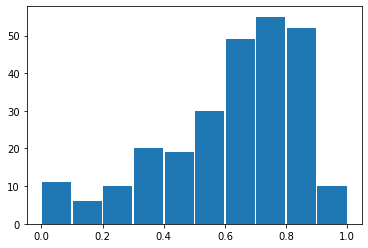

In [70]:
plt.hist(df['Solid'][(df['TRR_Prev'] < 0.8) & (df['OPR'] > 0.79)],rwidth=0.95,bins=bin_range)

In [80]:
df['CPR'][(df['TRR_Prev'] < 0.8) & (df['OPR'] < 0.2)].describe()

count    160.000000
mean       0.752972
std        0.200148
min        0.076714
25%        0.648452
50%        0.838482
75%        0.900779
max        0.966050
Name: CPR, dtype: float64

In [75]:
df['CPR'][(df['TRR_Prev'] < 0.8) & (df['OPR'] > 0.8)].describe()

count    259.000000
mean       0.310051
std        0.217240
min        0.033240
25%        0.134763
50%        0.250996
75%        0.432689
max        0.948280
Name: CPR, dtype: float64

### The above analysis concludes that, narrow range days doesn't provide any edge in predicting ORB trades

## After Expansion ( WS4 )

In [43]:
df['True_Range_ratio'][(df['TRR_Prev'] > df['TRR_Prev2']) & ( df['TRR_Prev2'] > df['TRR_Prev3']) & ( df['TRR_Prev3'] > df['TRR_Prev4'])].describe()

count    88.000000
mean      1.263172
std       0.983789
min       0.476460
25%       0.733777
50%       1.003461
75%       1.406128
max       8.059094
Name: True_Range_ratio, dtype: float64

(array([ 9.,  8.,  3.,  4.,  6., 13., 10., 11., 10., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

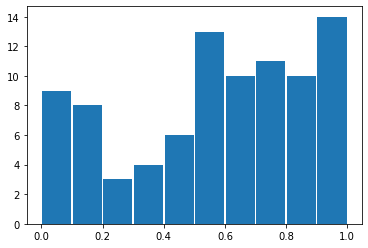

In [44]:
plt.hist(df['OPR'][(df['TRR_Prev'] > df['TRR_Prev2']) & ( df['TRR_Prev2'] > df['TRR_Prev3']) & ( df['TRR_Prev3'] > df['TRR_Prev4'])],rwidth=0.95,bins=bin_range)

In [84]:
df['OPR'][(df['TRR_Prev'] > df['TRR_Prev2']) & ( df['TRR_Prev2'] > df['TRR_Prev3']) & ( df['TRR_Prev3'] > df['TRR_Prev4'])].describe()

count    88.000000
mean      0.575201
std       0.301001
min       0.000000
25%       0.358656
50%       0.615601
75%       0.835091
max       1.000000
Name: OPR, dtype: float64

(array([173., 103.,  72., 104.,  82., 109., 112., 119., 121., 249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

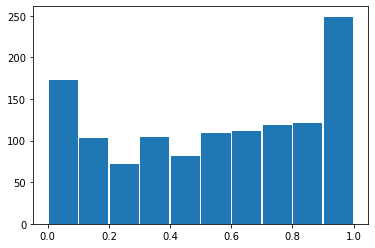

In [48]:
plt.hist(df['OPR'][(df['TRR_Prev'] > df['TRR_Prev2'])],rwidth=0.95,bins=bin_range)

In [85]:
df['OPR'][(df['TRR_Prev'] > df['TRR_Prev2'])].describe()

count    1244.000000
mean        0.544918
std         0.329123
min         0.000000
25%         0.250300
50%         0.580276
75%         0.848592
max         1.000000
Name: OPR, dtype: float64

(array([ 95.,  55.,  36.,  62.,  47.,  68.,  69.,  50.,  64., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

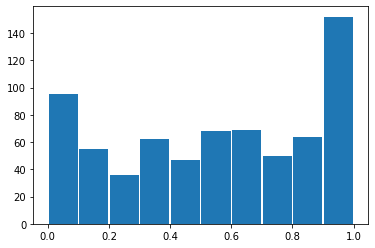

In [52]:
plt.hist(df['OPR'][(df['TRR_Prev'] > 1.45)],rwidth=0.95,bins=bin_range)

In [86]:
df['OPR'][(df['TRR_Prev'] > 1.45)].describe()

count    698.000000
mean       0.550834
std        0.329539
min        0.000000
25%        0.265624
50%        0.579924
75%        0.864069
max        1.000000
Name: OPR, dtype: float64

#### Again, wide range candles also doesn't give you any added information about the impending ORB trade

### 2) OPR, CPR of previous and next day compared to successful ORB trade

In [13]:
df['OPR_Next'] = df['OPR'].shift(1)
df['CPR_Next'] = df['CPR'].shift(1)
df['CPR_Prev'] = df['CPR'].shift(-1)
df['OPR_Prev'] = df['OPR'].shift(-1)

In [90]:
df['OPR_Prev'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       0.541502
std        0.328489
min        0.000000
25%        0.259106
50%        0.570115
75%        0.836845
max        1.000000
Name: OPR_Prev, dtype: float64

In [91]:
df['CPR_Prev'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       0.509259
std        0.282896
min        0.069620
25%        0.250043
50%        0.501562
75%        0.792949
max        0.954307
Name: CPR_Prev, dtype: float64

In [92]:
df['OPR_Next'][(df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)].describe()

count    356.000000
mean       0.560601
std        0.310376
min        0.000000
25%        0.304172
50%        0.574667
75%        0.856474
max        1.000000
Name: OPR_Next, dtype: float64

In [93]:
df['CPR_Next'][(df['OPR'] >= 0.80) & (df['CPR'] <= 0.2)].describe()

count    356.000000
mean       0.507007
std        0.293436
min        0.038998
25%        0.221882
50%        0.478695
75%        0.800074
max        0.967550
Name: CPR_Next, dtype: float64

In [88]:
df['OPR_Prev'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8)].describe()

count    356.000000
mean       0.551470
std        0.328650
min        0.000000
25%        0.245202
50%        0.575307
75%        0.859783
max        1.000000
Name: OPR_Prev, dtype: float64

In [90]:
df['OPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       0.531876
std        0.340988
min        0.000000
25%        0.184877
50%        0.592439
75%        0.848643
max        1.000000
Name: OPR_Next, dtype: float64

In [91]:
df['CPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2)].describe()

count    339.000000
mean       0.535253
std        0.282022
min        0.046209
25%        0.289210
50%        0.530372
75%        0.798345
max        0.962774
Name: CPR_Next, dtype: float64

## Checking for directional bias after trending days


In [14]:
df['CPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) & (df['OPR_Next'] <= 0.2)].describe()

count    88.000000
mean      0.730949
std       0.205079
min       0.189922
25%       0.614104
50%       0.804782
75%       0.899597
max       0.962774
Name: CPR_Next, dtype: float64

In [94]:
df['CPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) & (df['OPR_Next'] >= 0.8)].describe()

count    100.000000
mean       0.345566
std        0.235369
min        0.051352
25%        0.142462
50%        0.311169
75%        0.493542
max        0.924213
Name: CPR_Next, dtype: float64

In [95]:
df['CPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['OPR_Next'] >= 0.8)].describe()

count    103.000000
mean       0.281003
std        0.185243
min        0.057082
25%        0.124529
50%        0.242472
75%        0.390167
max        0.826845
Name: CPR_Next, dtype: float64

In [99]:
df['CPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['OPR_Next'] <= 0.2)].describe()

count    61.000000
mean      0.779079
std       0.177703
min       0.220039
25%       0.702956
50%       0.829921
75%       0.913392
max       0.967550
Name: CPR_Next, dtype: float64

#### So after a down trending move, there's no significant directional bias as such but for an uptrending move there is an edge towards bearish side


## Directional Bias after trending days based on Gaps

In [144]:
df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open'] < df['Prev_Close']) ].describe()

count    138.000000
mean       0.603376
std        0.301917
min        0.000000
25%        0.378167
50%        0.607907
75%        0.888784
max        1.000000
Name: OPR_Next, dtype: float64

(array([ 9.,  9.,  6., 16.,  9., 20., 12.,  9., 15., 33.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

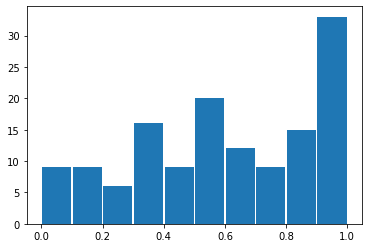

In [145]:
plt.hist(df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open'] < df['Prev_Close']) ],rwidth=0.95,bins=bin_range)

### The above histogram, i came across was just by fluke. But it suggests strong directional bias for days after large fall whose open is below prev days low. 


In [153]:
df['Open_Next'] = df['Open'].shift(1)
df['OPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) &  (df['Open_Next'] > df['Close'])].describe()

count    244.000000
mean       0.568546
std        0.331655
min        0.000000
25%        0.314746
50%        0.616076
75%        0.868647
max        1.000000
Name: OPR_Next, dtype: float64

(array([38., 14.,  8., 14., 18., 21., 34., 20., 22., 55.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

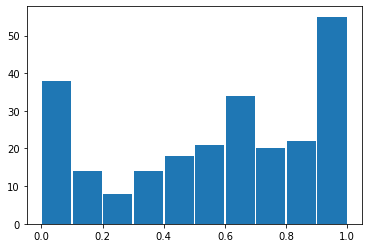

In [152]:
plt.hist(df['OPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) &  (df['Open_Next'] > df['Close'])],rwidth=0.95,bins=bin_range)

In [154]:
df['Open_Next'] = df['Open'].shift(1)
df['OPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) &  (df['Open_Next'] < df['Close'])].describe()

count    94.000000
mean      0.442347
std       0.347139
min       0.000000
25%       0.110139
50%       0.375565
75%       0.794794
max       1.000000
Name: OPR_Next, dtype: float64

(array([21., 14.,  6.,  8.,  3.,  6.,  7.,  6., 10., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

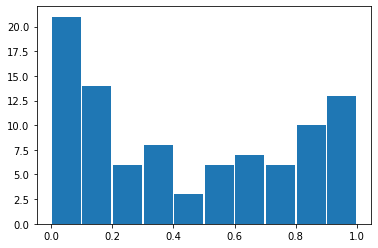

In [155]:
plt.hist(df['OPR_Next'][(df['CPR'] >= 0.80) & (df['OPR'] <= 0.2) &  (df['Open_Next'] < df['Close'])],rwidth=0.95,bins=bin_range)

#### After up-trending day, there are high chances that it would open gap up. ( 70% of the times )
#### If it opens gap down, chances are that it may have another leg up for the coming day

In [156]:
df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open_Next'] < df['Close'])].describe()

count    148.000000
mean       0.541880
std        0.303039
min        0.000000
25%        0.310595
50%        0.548534
75%        0.785292
max        1.000000
Name: OPR_Next, dtype: float64

(array([14., 12.,  8., 17., 13., 22., 12., 16.,  7., 27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

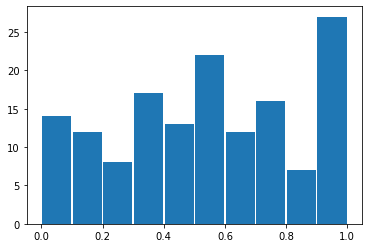

In [159]:
plt.hist(df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open_Next'] < df['Close'])],rwidth=0.95,bins=bin_range)

In [157]:
df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open_Next'] > df['Close'])].describe()

count    208.000000
mean       0.573922
std        0.315541
min        0.000000
25%        0.288923
50%        0.589459
75%        0.884076
max        1.000000
Name: OPR_Next, dtype: float64

(array([18., 17., 19., 16., 16., 19., 20., 14., 23., 46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

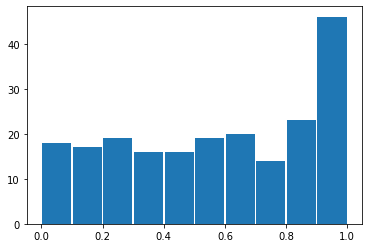

In [160]:
plt.hist(df['OPR_Next'][(df['CPR'] <= 0.20) & (df['OPR'] >= 0.8) & (df['Open_Next'] > df['Close'])],rwidth=0.95,bins=bin_range)

#### Gap up open is more likely on the cards after a sell off. And once it opens gap up there are high chances that it maybe the high for the day.
#### Gap down opens doesn't trend well at all !! Its the lowest ORB % shown as of now.

## Identifying Stop-Loss on Trending days

In [15]:
df['Prev_Close'] = df['Close'].shift(-1)
df['Open-Low%'] = ((df['Open'] - df['Low'])/df['Prev_Close'])*100
df['Open-High%'] = ((df['High'] - df['Open'])/df['Prev_Close'])*100

In [102]:
df['Open-Low%'].describe()

count    2586.000000
mean        0.699112
std         0.749790
min         0.000000
25%         0.230131
50%         0.517658
75%         0.943692
max        16.013546
Name: Open-Low%, dtype: float64

In [103]:
df['Open-High%'].describe()

count    2586.000000
mean        0.554006
std         0.648791
min         0.000000
25%         0.141955
50%         0.384156
75%         0.752404
max        10.967560
Name: Open-High%, dtype: float64

In [21]:
df['Open-Low%'][(df['OPR'] > 0.2) & (df['OPR'] < 0.5)].describe()

count    546.000000
mean       0.393813
std        0.334591
min        0.088936
25%        0.238944
50%        0.324881
75%        0.454367
max        5.760628
Name: Open-Low%, dtype: float64

In [19]:
df['Open-High%'][(df['OPR'] > 0.2) & (df['OPR'] < 0.5)].describe()

count    546.000000
mean       0.732935
std        0.642162
min        0.167005
25%        0.435020
50%        0.604965
75%        0.863291
max       10.967560
Name: Open-High%, dtype: float64

### So if your assumption is trendless then generally the move doesn't go beyond 0.75% of previous day's close, for more than 80% of the times. So, just in case, if you are trying to fade the move off the open, and it moves beyond 0.75% then chances are that it will continue to move against you. Resulting in a huge loss.

In [165]:
df['Open-Low%'][(df['OPR'] < 0.21)].describe()

count    585.000000
mean       0.098615
std        0.122895
min        0.000000
25%        0.014770
50%        0.066650
75%        0.140509
max        1.285790
Name: Open-Low%, dtype: float64

In [166]:
df['Open-High%'][(df['OPR'] > 0.79)].describe()

count    824.000000
mean       0.094677
std        0.104948
min        0.000000
25%        0.018200
50%        0.065441
75%        0.139588
max        1.039183
Name: Open-High%, dtype: float64

### Conclusion : From the above based numbers, Stop Loss for ORB trades should be placed 0.2-0.3% below/above the open

#### But max. loss on ORB trades is only 1%. We can combine this information with the previous study that trendless days tend to max out at 0.75% from open and prepare some cool setups.

In [176]:
df['Open-High%'][(df['OPR'] < 0.2)].describe()

count    570.000000
mean       1.217777
std        0.786417
min        0.301271
25%        0.705350
50%        1.051192
75%        1.496102
max        8.224587
Name: Open-High%, dtype: float64

In [175]:
df['Open-Low%'][(df['OPR'] > 0.8)].describe()

count    805.000000
mean       1.304169
std        0.929986
min        0.235746
25%        0.766339
50%        1.059995
75%        1.585306
max       16.013546
Name: Open-Low%, dtype: float64

### Range Compared to previous days close

In [16]:
df['Range~Prev_Close'] = ((df['High'] - df['Low'])/df['Prev_Close'])*100
df['Range~Prev_Close'].describe()

count    2586.000000
mean        1.253119
std         0.875002
min         0.247007
25%         0.751041
50%         1.057138
75%         1.490668
max        16.728188
Name: Range~Prev_Close, dtype: float64

In [169]:
df['Range~Prev_Close'][(df['OPR'] <= 0.2) & (df['Open-Low%'] > 0.2)].describe()

count    72.000000
mean      2.339115
std       1.499566
min       1.088061
25%       1.534393
50%       1.885609
75%       2.391655
max       8.529177
Name: Range~Prev_Close, dtype: float64

In [125]:
df['Range~Prev_Close'][(df['OPR'] >= 0.8) & (df['Open-High%'] > 0.2)].describe()

count    92.000000
mean      2.093712
std       1.058531
min       1.017183
25%       1.391346
50%       1.793193
75%       2.479307
max       8.035017
Name: Range~Prev_Close, dtype: float64

In [130]:
df['CPR'][(df['OPR'] >= 0.8) & (df['Open-High%'] > 0.2)].describe()

count    92.000000
mean      0.291971
std       0.253052
min       0.053977
25%       0.104997
50%       0.176909
75%       0.391248
max       0.948280
Name: CPR, dtype: float64

In [131]:
df['CPR'][(df['OPR'] <= 0.2) & (df['Open-Low%'] > 0.2)].describe()

count    72.000000
mean      0.754066
std       0.250619
min       0.069586
25%       0.673961
50%       0.870422
75%       0.926782
max       0.967550
Name: CPR, dtype: float64

#### Interesting point to note is that the outliers who tend to move around a bit more ( df['Open-Low%'] & df['Open-High%']/  > 0.2) than the norm, tend to generate good returns once they start moving in the right direction.

### R2R on both of this types

In [126]:
df['Range~Prev_Close'][(df['OPR'] >= 0.8) & (df['Open-High%'] < 0.2)].describe()

count    713.000000
mean       1.304363
std        0.904247
min        0.286397
25%        0.784543
50%        1.089358
75%        1.572036
max       16.019594
Name: Range~Prev_Close, dtype: float64

In [127]:
df['Range~Prev_Close'][(df['OPR'] <= 0.2) & (df['Open-Low%'] < 0.2)].describe()

count    498.000000
mean       1.164401
std        0.576549
min        0.329121
25%        0.746040
50%        1.048624
75%        1.436424
max        4.465204
Name: Range~Prev_Close, dtype: float64

In [128]:
df['CPR'][(df['OPR'] >= 0.8) & (df['Open-High%'] < 0.2)].describe()

count    713.000000
mean       0.312979
std        0.218524
min        0.033240
25%        0.131389
50%        0.247466
75%        0.442969
max        0.926172
Name: CPR, dtype: float64

In [132]:
df['CPR'][(df['OPR'] <= 0.2) & (df['Open-Low%'] < 0.2)].describe()

count    498.000000
mean       0.754911
std        0.194065
min        0.076714
25%        0.653634
50%        0.836480
75%        0.900780
max        0.966050
Name: CPR, dtype: float64

In [171]:
df['Solid'][df['OPR'] > 0.8].sum()

498.79889733457867

In [172]:
df['Solid'][df['OPR'] < 0.2].sum()

388.262286961851

###  3) Two consecutive trending days

In [106]:
df['True_Range_ratio'][(df['OPR'] >= 0.80) & (df['OPR_Prev'] >= 0.8) & (df['CPR_Prev'] <= 0.2) & (df['CPR'] <= 0.2) ].describe()

count    46.000000
mean      1.631111
std       0.720346
min       0.587260
25%       1.095179
50%       1.425943
75%       2.155704
max       3.720404
Name: True_Range_ratio, dtype: float64

In [110]:
df['True_Range_ratio'][(df['OPR'] <= 0.2) & (df['OPR_Prev'] <= 0.2) & (df['CPR_Prev'] >= 0.8) & (df['CPR'] >= 0.8)].describe()

count    44.000000
mean      1.278755
std       0.506259
min       0.514062
25%       0.925167
50%       1.158003
75%       1.597088
max       2.637499
Name: True_Range_ratio, dtype: float64

### 4) Gaps after trending days 

In [100]:
df['Gap%'] = ((df['Open'] - df['Close'].shift(-1))/df['Close'].shift(-1))*100

In [101]:
df['Gap%'].describe()

count    2586.000000
mean        0.121979
std         0.785483
min        -9.144236
25%        -0.086822
50%         0.113176
75%         0.361896
max        19.829623
Name: Gap%, dtype: float64

In [103]:
df['Abs_Gap%'] = ((abs(df['Open'] - df['Close'].shift(-1)))/df['Close'].shift(-1))*100

In [104]:
df['Abs_Gap%'].describe()

count    2586.000000
mean        0.410207
std         0.680832
min         0.000000
25%         0.103453
50%         0.266349
75%         0.496533
max        19.829623
Name: Abs_Gap%, dtype: float64

In [105]:
df.head()

,Open,High,Low,Close,OPR,CPR,Solid,True_Range_ratio,TRR_Next,TRR_Prev,OPR_Next,CPR_Next,CPR_Prev,OPR_Prev,Gap%,Abs_Gap%
Date,,,,,,,,,,,,,,,,
2021-11-25,17417.30,17564.35,17351.70,17536.25,0.308488,0.867858,0.559370,1.212631,NaN,1.416017,NaN,NaN,0.247567,0.795012,0.012920,0.012920
2021-11-24,17550.05,17600.60,17354.00,17415.05,0.795012,0.247567,0.547445,1.416017,1.212631,1.928774,0.308488,0.867858,0.850859,0.194461,0.266806,0.266806
2021-11-23,17281.75,17553.70,17216.10,17503.35,0.194461,0.850859,0.656398,1.928774,1.416017,3.013226,0.795012,0.247567,0.259337,0.982851,-0.773976,0.773976
2021-11-22,17796.25,17805.25,17280.45,17416.55,0.982851,0.259337,0.723514,3.013226,1.928774,1.447244,0.194461,0.850859,0.296772,0.785881,0.177035,0.177035
2021-11-18,17890.55,17945.60,17688.50,17764.80,0.785881,0.296772,0.489109,1.447244,3.013226,0.801178,0.982851,0.259337,0.135286,0.419107,-0.045255,0.045255


In [112]:
df['Abs_Gap%'][(df['OPR'] >= 0.80) | (df['OPR'] <= 0.2)].describe()

count    1375.000000
mean        0.439046
std         0.787124
min         0.000000
25%         0.119564
50%         0.279861
75%         0.520163
max        19.829623
Name: Abs_Gap%, dtype: float64

In [115]:
df['Abs_Gap%'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2)].describe() 

count    356.000000
mean       0.500825
std        1.186555
min        0.000635
25%        0.101026
50%        0.272548
75%        0.576100
max       19.829623
Name: Abs_Gap%, dtype: float64

In [116]:
df['Abs_Gap%'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2)].describe()

count    339.000000
mean       0.434863
std        0.836762
min        0.000000
25%        0.098197
50%        0.232549
75%        0.434493
max        9.144236
Name: Abs_Gap%, dtype: float64

In [117]:
df['Gap%'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2)].describe()

count    339.000000
mean       0.163778
std        0.928942
min       -9.144236
25%       -0.021378
50%        0.149116
75%        0.343188
max        7.273194
Name: Gap%, dtype: float64

In [118]:
df['Gap%'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2)].describe() 

count    356.000000
mean       0.107138
std        1.283719
min       -5.031230
25%       -0.162958
50%        0.037082
75%        0.358931
max       19.829623
Name: Gap%, dtype: float64

In [146]:
df['OPR'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2) & (df['Gap%'] > 0.25)].describe() 

count    117.000000
mean       0.584387
std        0.320002
min        0.000000
25%        0.265711
50%        0.643389
75%        0.885427
max        1.000000
Name: OPR, dtype: float64

In [141]:
df['OPR'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2) & (df['Gap%'] < -0.1)].describe()

count    63.000000
mean      0.436759
std       0.342674
min       0.000000
25%       0.112445
50%       0.373188
75%       0.764825
max       1.000000
Name: OPR, dtype: float64

In [147]:
df['CPR'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2) & (df['Gap%'] > 0.25)].describe() 

count    117.000000
mean       0.555446
std        0.290605
min        0.057082
25%        0.293497
50%        0.586511
75%        0.829921
max        0.945361
Name: CPR, dtype: float64

In [148]:
df['CPR'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2) & (df['Gap%'] < -0.1)].describe()

count    63.000000
mean      0.520045
std       0.286453
min       0.046209
25%       0.207143
50%       0.549428
75%       0.773559
max       0.932441
Name: CPR, dtype: float64

In [152]:
df['True_Range_ratio'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2) & (df['Gap%'] < -0.1)].describe()

count    63.000000
mean      1.407672
std       1.152017
min       0.497773
25%       0.793340
50%       0.986890
75%       1.671691
max       7.564190
Name: True_Range_ratio, dtype: float64

In [154]:
df['True_Range_ratio'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2) & (df['Gap%'] > 0.25) ].describe() 

count    117.000000
mean       1.472872
std        0.940695
min        0.246096
25%        0.874415
50%        1.203738
75%        1.793131
max        5.444407
Name: True_Range_ratio, dtype: float64

In [163]:
df['OPR'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2) & (df['Gap%'] < -0.4) ].describe() 

count    51.000000
mean      0.501336
std       0.312011
min       0.004517
25%       0.231642
50%       0.517331
75%       0.780810
max       1.000000
Name: OPR, dtype: float64

In [160]:
df['OPR'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2) & (df['Gap%'] > 0.25)].describe()

count    126.000000
mean       0.629768
std        0.309255
min        0.000000
25%        0.448769
50%        0.694149
75%        0.903648
max        1.000000
Name: OPR, dtype: float64

## Conclusion :

### Down Trending Day
#### Volitility Increases the next day -- There is no directional bias the next day -- If it opens Gap-up, then it is observed that OPR generally lies in the upper half, while CPR lies in middle -- no direction bias for significant gap down -- 2 down trending days are rare but if true then true range is wide too

### Up Trending Day 
#### There is no change in volitility as such -- Again, there is no directional bais --If it opens Gap-down, then it is observed that OPR generally lies in the lower half, while CPR lies in middle -- AND vice versa for Gap up open


 ## Large Wicks


In [165]:
df['True_Range_ratio'][(df['OPR'] >= 0.80) & (df['CPR'] >= 0.80)].describe() 

count    36.000000
mean      1.512367
std       2.564223
min       0.452996
25%       0.694031
50%       1.054416
75%       1.360854
max      16.133046
Name: True_Range_ratio, dtype: float64

In [166]:
df['True_Range_ratio'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] >= 0.80)].describe() 

count    36.000000
mean      1.159407
std       0.566868
min       0.373049
25%       0.729915
50%       1.040561
75%       1.412783
max       2.334844
Name: True_Range_ratio, dtype: float64

In [170]:
df['True_Range_ratio'][(df['OPR_Prev'] <= 0.20) & (df['CPR_Prev'] <= 0.20)].describe() 

count    16.000000
mean      1.289915
std       0.842482
min       0.619351
25%       0.741554
50%       0.977845
75%       1.330160
max       3.331808
Name: True_Range_ratio, dtype: float64

In [173]:
df['Real_Move'] = ((df['Open'] - df['Close'])/df['Close'])*100

In [176]:
df['Real_Move'][(df['OPR_Prev'] <= 0.30) & (df['CPR_Prev'] <= 0.30)].describe() 

count    37.000000
mean     -0.025521
std       1.180097
min      -2.540608
25%      -0.754359
50%      -0.238425
75%       0.446617
max       2.883475
Name: Real_Move, dtype: float64

In [179]:
df['Real_Move'][(df['OPR_Prev'] >= 0.70) & (df['CPR_Prev'] >= 0.70)].describe() 

count    107.000000
mean       0.048908
std        1.000292
min       -4.322818
25%       -0.397650
50%       -0.063942
75%        0.589574
max        3.162377
Name: Real_Move, dtype: float64

In [180]:
df['OPR'][(df['OPR_Prev'] <= 0.30) & (df['CPR_Prev'] <= 0.30)].describe() 

count    37.000000
mean      0.497862
std       0.358744
min       0.007523
25%       0.080238
50%       0.574795
75%       0.913377
max       0.999646
Name: OPR, dtype: float64

In [181]:
df['CPR'][(df['OPR_Prev'] <= 0.30) & (df['CPR_Prev'] <= 0.30)].describe()

count    37.000000
mean      0.576802
std       0.320075
min       0.062580
25%       0.252071
50%       0.723258
75%       0.864236
max       0.932602
Name: CPR, dtype: float64

In [182]:
df['CPR'][(df['OPR_Prev'] >= 0.70) & (df['CPR_Prev'] >= 0.70)].describe() 

count    107.000000
mean       0.538115
std        0.296078
min        0.087470
25%        0.224280
50%        0.518221
75%        0.834730
max        0.954032
Name: CPR, dtype: float64

In [183]:
df['OPR'][(df['OPR_Prev'] >= 0.70) & (df['CPR_Prev'] >= 0.70)].describe() 

count    107.000000
mean       0.536108
std        0.336009
min        0.000000
25%        0.207716
50%        0.520161
75%        0.826125
max        1.000000
Name: OPR, dtype: float64

In [189]:
df['Gap%'][(df['OPR_Prev'] >= 0.70) & (df['CPR_Prev'] >= 0.70)].describe() 

count    107.000000
mean       0.026834
std        0.826261
min       -5.571487
25%       -0.056725
50%        0.195764
75%        0.383995
max        1.332729
Name: Gap%, dtype: float64

In [190]:
df['Gap%'][(df['OPR_Prev'] <= 0.30) & (df['CPR_Prev'] <= 0.30)].describe()

count    37.000000
mean      0.148130
std       0.704648
min      -1.382693
25%      -0.163333
50%       0.118920
75%       0.369069
max       2.564381
Name: Gap%, dtype: float64

In [200]:
df['OPR'][(df['OPR_Prev'] >= 0.70) & (df['CPR_Prev'] >= 0.70) & (df['Gap%'] < -0)].describe() 

count    33.000000
mean      0.478013
std       0.329592
min       0.077842
25%       0.198468
50%       0.436072
75%       0.757435
max       1.000000
Name: OPR, dtype: float64

In [209]:
df['OPR'][(df['OPR_Prev'] <= 0.30) & (df['CPR_Prev'] <= 0.30) & (df['Gap%'] > 0.1)].describe() 

count    19.000000
mean      0.519780
std       0.382111
min       0.007523
25%       0.078426
50%       0.604962
75%       0.914293
max       0.999646
Name: OPR, dtype: float64

## Conclusion :

### After large wick candles there is no apparent directional edge in the market

## Hook Days

In [214]:
df[(df['OPR'] <= 0.2) & (df['CPR'] >= 0.8) & (df['CPR_Prev'] <= 0.2) & (df['OPR_Prev'] >= 0.8)].count()

Open                36
High                36
Low                 36
Close               36
OPR                 36
CPR                 36
Solid               36
True_Range_ratio    36
TRR_Next            36
TRR_Prev            36
OPR_Next            36
CPR_Next            36
CPR_Prev            36
OPR_Prev            36
Gap%                36
Abs_Gap%            36
Real_Move           36
dtype: int64

In [213]:
df[(df['OPR'] <= 0.2) & (df['CPR'] >= 0.8) & (df['CPR_Prev'] <= 0.2) & (df['OPR_Prev'] >= 0.8)]

,Open,High,Low,Close,OPR,CPR,Solid,True_Range_ratio,TRR_Next,TRR_Prev,OPR_Next,CPR_Next,CPR_Prev,OPR_Prev,Gap%,Abs_Gap%,Real_Move
Date,,,,,,,,,,,,,,,,,
2021-05-21,14987.80,15190.00,14985.85,15175.3,0.009552,0.927994,0.918442,1.345278,0.729058,1.240436,0.594765,0.471570,0.114386,0.852893,0.548435,0.548435,-1.235560
2021-02-01,13758.60,14336.35,13661.75,14281.2,0.143567,0.918248,0.774681,4.723693,1.792413,2.714418,0.045515,0.680632,0.102270,0.945285,0.909451,0.909451,-3.659356
2020-04-07,8446.30,8819.40,8360.95,8792.2,0.186171,0.940670,0.754499,5.214281,5.461383,3.720404,0.073252,0.198409,0.093101,1.000000,4.484277,4.484277,-3.934169
2019-12-27,12172.90,12258.45,12157.90,12245.0,0.149180,0.866236,0.717056,0.821151,0.592819,0.846940,0.841019,0.567103,0.069620,0.905550,0.386772,0.386772,-0.588812
2019-12-17,12082.45,12182.75,12070.35,12165.0,0.107651,0.842082,0.734431,0.923962,0.923962,0.733013,0.107651,0.842082,0.075835,0.962649,0.244338,0.244338,-0.678586
2018-10-10,10331.85,10482.35,10318.25,10460.0,0.082876,0.863803,0.780926,1.568834,1.928376,1.147947,0.158095,0.483405,0.183087,0.938266,0.299485,0.299485,-1.225143
2018-06-29,10612.85,10723.05,10612.35,10714.0,0.004517,0.918248,0.913731,1.033228,0.358326,0.724772,0.952555,0.386861,0.114744,0.895513,-1.385895,1.385895,-0.944092
2018-06-20,10734.65,10781.80,10724.05,10772.0,0.183550,0.830303,0.646753,0.536112,0.779257,0.823996,0.986260,0.180406,0.099717,1.000000,0.230159,0.230159,-0.346732
2018-05-11,10741.95,10812.05,10724.45,10806.0,0.199772,0.930936,0.731164,0.810661,0.556172,0.751680,0.672213,0.519967,0.136561,0.926754,0.242161,0.242161,-0.592726


In [215]:
df[(df['OPR'] >= 0.8) & (df['CPR'] <= 0.2) & (df['CPR_Prev'] >= 0.8) & (df['OPR_Prev'] <= 0.2)].count()

Open                39
High                39
Low                 39
Close               39
OPR                 39
CPR                 39
Solid               39
True_Range_ratio    39
TRR_Next            39
TRR_Prev            39
OPR_Next            39
CPR_Next            39
CPR_Prev            39
OPR_Prev            39
Gap%                39
Abs_Gap%            39
Real_Move           39
dtype: int64

In [216]:
df[(df['OPR'] >= 0.8) & (df['CPR'] <= 0.2) & (df['CPR_Prev'] >= 0.8) & (df['OPR_Prev'] <= 0.2)]

,Open,High,Low,Close,OPR,CPR,Solid,True_Range_ratio,TRR_Next,TRR_Prev,OPR_Next,CPR_Next,CPR_Prev,OPR_Prev,Gap%,Abs_Gap%,Real_Move
Date,,,,,,,,,,,,,,,,,
2021-10-06,17861.50,17884.60,17613.15,17646.0,0.914901,0.121017,0.793885,1.538309,0.526971,1.080388,0.498667,0.283200,0.942093,0.106206,0.219949,0.219949,1.221240
2021-03-31,14811.85,14813.75,14670.25,14690.7,0.986760,0.142509,0.844251,0.976808,1.283013,1.742663,0.555439,0.916907,0.879397,0.042134,-0.223980,0.223980,0.824671
2020-10-15,12023.45,12025.45,11661.30,11680.0,0.994508,0.051352,0.943155,3.117723,0.417306,1.304787,0.081197,0.464103,0.887580,0.044766,5.607817,5.607817,2.940497
2020-06-24,10529.25,10553.15,10281.95,10305.0,0.911873,0.084993,0.826881,2.631732,1.626166,2.637499,0.245368,0.558876,0.924103,0.068382,4.342979,4.342979,2.176128
2020-05-04,9533.50,9533.50,9266.95,9293.5,1.000000,0.099606,0.900394,2.868134,2.825997,1.597886,0.917355,0.057082,0.814979,0.139638,-3.310378,3.310378,2.582450
2019-12-16,12131.35,12134.65,12046.30,12053.0,0.962649,0.075835,0.886814,0.733013,0.923962,0.622621,0.107651,0.842082,0.829236,0.037209,0.375228,0.375228,0.650046
2018-12-21,10944.25,10963.65,10738.65,10754.0,0.913778,0.068222,0.845556,2.092245,1.247773,0.753356,0.989478,0.103345,0.860000,0.062424,-0.061638,0.061638,1.769109
2018-09-17,11464.95,11464.95,11366.90,11377.0,1.000000,0.103009,0.896991,0.861826,1.263522,0.805037,0.790175,0.063509,0.911003,0.139698,-0.434650,0.434650,0.773051
2018-06-21,10808.45,10809.60,10725.90,10741.0,0.986260,0.180406,0.805854,0.779257,1.169485,0.536112,0.254840,0.873568,0.830303,0.183550,0.338377,0.338377,0.627968


## Inside Day's

In [4]:
import pandas as pd
db = pd.read_csv("NIFTY_50.csv", parse_dates=["Date"], index_col="Date")

In [5]:
db.head()

,Open,High,Low,Close
Date,,,,
2021-11-25,17417.30,17564.35,17351.70,17536.25
2021-11-24,17550.05,17600.60,17354.00,17415.05
2021-11-23,17281.75,17553.70,17216.10,17503.35
2021-11-22,17796.25,17805.25,17280.45,17416.55
2021-11-18,17890.55,17945.60,17688.50,17764.80


In [13]:
db.shape

(2625, 4)

In [14]:
db['Prev_High'] = db['High'].shift(-1)
db['Prev_Low'] = db['Low'].shift(-1)

In [16]:
db["OPR"] = (db['Open'] - db['Low'])/(db['High'] - db['Low'])
db["CPR"] = (db['Close'] - db['Low'])/(db['High'] - db['Low'])

In [17]:
db['OPR'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])].describe()

count    229.000000
mean       0.564293
std        0.295089
min        0.000000
25%        0.344218
50%        0.578457
75%        0.833333
max        1.000000
Name: OPR, dtype: float64

In [18]:
db['OPR_next'] = db['OPR'].shift(1)

In [19]:
db['OPR_next'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])].describe()

count    229.000000
mean       0.527853
std        0.338038
min        0.000000
25%        0.224691
50%        0.544023
75%        0.853066
max        1.000000
Name: OPR_next, dtype: float64

(array([37., 14., 19., 16., 18., 28., 18., 11., 19., 49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

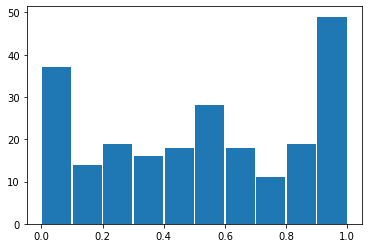

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

bin_range = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
plt.hist(db['OPR_next'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])],rwidth=0.95,bins=bin_range)

In [25]:
db['CPR_next'] = db['CPR'].shift(1)
db["Solid"] = (abs(db['Open'] - db['Close']))/(db['High'] - db['Low'])
db["Solid_next"] = db['Solid'].shift(1)

(array([20., 21., 21., 23., 22., 29., 19., 29., 33., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

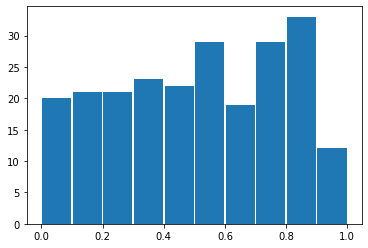

In [26]:
plt.hist(db['Solid_next'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])],rwidth=0.95,bins=bin_range)

In [27]:
db['Solid_next'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])].describe()

count    229.000000
mean       0.510445
std        0.273775
min        0.005656
25%        0.280702
50%        0.533259
75%        0.768534
max        0.966760
Name: Solid_next, dtype: float64

(array([11., 45., 26., 16., 16., 15., 15., 27., 33., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

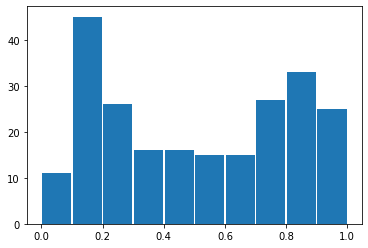

In [28]:
plt.hist(db['CPR_next'][(db['Prev_High'] > db['High']) & ( db['Prev_Low'] < db['Low'])],rwidth=0.95,bins=bin_range)

## Conclusion

### It suggests that inside days offer a decisive edge in identifying ORB trades
### The OPR chart shows clear accumulation at extremes but 'CPR' and 'Solid' chart suggests that it doesn't trend well. 

# Doji

In [29]:
db['Prev_Open'] = db['Open'].shift(-1)
db['Prev_Close'] = db['Close'].shift(-1)

In [30]:
db['True_Range'] = db['High'] - db['Low']

In [31]:
db['True_Range'].describe()

count    2587.000000
mean       99.682586
std        77.755706
min        16.200000
25%        57.925000
50%        80.550000
75%       115.625000
max      1604.250000
Name: True_Range, dtype: float64

In [33]:
db['True_Range_ratio'] = ((db['High'] - db['Low'])/db['Close'])*100
db['True_Range_ratio'].describe()

count    2587.000000
mean        1.253938
std         0.876865
min         0.246096
25%         0.751932
50%         1.055514
75%         1.492380
max        16.133046
Name: True_Range_ratio, dtype: float64

In [42]:
db['Solid_%'] = (abs(db['Open'] - db['Close'])/db['True_Range'])

In [44]:
db['Solid'].describe()

count    2587.000000
mean        0.495214
std         0.264242
min         0.000602
25%         0.277160
50%         0.501279
75%         0.727946
max         0.966760
Name: Solid, dtype: float64

In [45]:
db = db.drop('Solid_%', 1)

C:\Users\NINAD\AppData\Local\Temp/ipykernel_10052/3971408692.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  db = db.drop('Solid_%', 1)


In [46]:
db.head()

,Open,High,Low,Close,Prev_High,Prev_Low,OPR,CPR,OPR_next,CPR_next,Solid,Solid_next,Prev_Open,Prev_Close,True_Range,True_Range_ratio
Date,,,,,,,,,,,,,,,,
2021-11-25,17417.30,17564.35,17351.70,17536.25,17600.60,17354.00,0.308488,0.867858,NaN,NaN,0.559370,NaN,17550.05,17415.05,212.65,1.212631
2021-11-24,17550.05,17600.60,17354.00,17415.05,17553.70,17216.10,0.795012,0.247567,0.308488,0.867858,0.547445,0.559370,17281.75,17503.35,246.60,1.416017
2021-11-23,17281.75,17553.70,17216.10,17503.35,17805.25,17280.45,0.194461,0.850859,0.795012,0.247567,0.656398,0.547445,17796.25,17416.55,337.60,1.928774
2021-11-22,17796.25,17805.25,17280.45,17416.55,17945.60,17688.50,0.982851,0.259337,0.194461,0.850859,0.723514,0.656398,17890.55,17764.80,524.80,3.013226
2021-11-18,17890.55,17945.60,17688.50,17764.80,18022.65,17879.25,0.785881,0.296772,0.982851,0.259337,0.489109,0.723514,17939.35,17898.65,257.10,1.447244


In [49]:
db['OPR_next'][db['Solid'] < 0.27].describe()

count    621.000000
mean       0.533195
std        0.343511
min        0.000000
25%        0.196513
50%        0.561497
75%        0.864945
max        1.000000
Name: OPR_next, dtype: float64

(array([114.,  61.,  37.,  48.,  46.,  59.,  55.,  52.,  74., 149.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

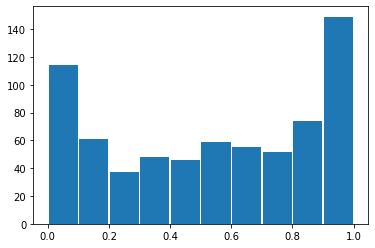

In [52]:
plt.hist(db['OPR_next'][db['Solid'] < 0.3],rwidth=0.95,bins=bin_range)

(array([ 36., 127.,  65.,  55.,  64.,  51.,  45.,  55., 127.,  70.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

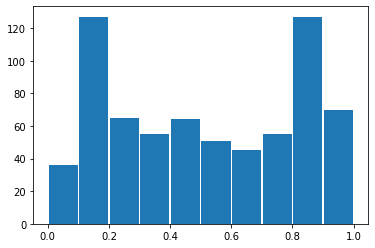

In [53]:
plt.hist(db['CPR_next'][db['Solid'] < 0.3],rwidth=0.95,bins=bin_range)

(array([ 55.,  60.,  59.,  82.,  73.,  69.,  80.,  77., 109.,  31.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

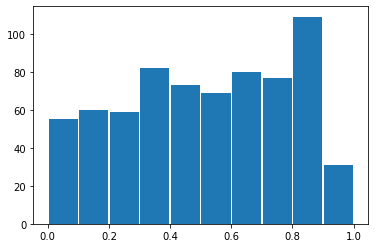

In [54]:
plt.hist(db['Solid_next'][db['Solid'] < 0.3],rwidth=0.95,bins=bin_range)

In [55]:
db['Solid_next'][db['Solid'] < 0.3].describe()

count    695.000000
mean       0.513915
std        0.267860
min        0.003770
25%        0.299340
50%        0.525992
75%        0.757986
max        0.941176
Name: Solid_next, dtype: float64